<a href="https://colab.research.google.com/github/godud2604/AI-bootcamp/blob/main/EMR%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
PATH = '/content/drive/MyDrive/biodata/mimic-iii-clinical-database-demo-1.4/'

In [101]:
import pandas as pd

In [102]:
patients = pd.read_csv(PATH+"PATIENTS.csv", index_col=0)
admissions = pd.read_csv(PATH+"ADMISSIONS.csv", index_col=0)
diagnose_icd = pd.read_csv(PATH+"DIAGNOSES_ICD.csv", index_col=0)
icustays = pd.read_csv(PATH+"ICUSTAYS.csv", index_col=0)
d_icd_diagnoses = pd.read_csv(PATH+"D_ICD_DIAGNOSES.csv", index_col=0)
chartevents = pd.read_csv(PATH+"CHARTEVENTS.csv", index_col=0)

<ipython-input-102-93118852c45d>:6: DtypeWarning: Columns (8,10,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  chartevents = pd.read_csv(PATH+"CHARTEVENTS.csv", index_col=0)


In [103]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 9467 to 31872
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   subject_id   100 non-null    int64 
 1   gender       100 non-null    object
 2   dob          100 non-null    object
 3   dod          100 non-null    object
 4   dod_hosp     70 non-null     object
 5   dod_ssn      77 non-null     object
 6   expire_flag  100 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 6.2+ KB


In [104]:
patients.nunique()

subject_id     100
gender           2
dob             99
dod            100
dod_hosp        70
dod_ssn         77
expire_flag      1
dtype: int64

In [105]:
patients['subject_id']

row_id
9467     10006
9472     10011
9474     10013
9478     10017
9479     10019
         ...  
31838    44083
31853    44154
31867    44212
31870    44222
31872    44228
Name: subject_id, Length: 100, dtype: int64

In [106]:
patients['gender'].value_counts()

F    55
M    45
Name: gender, dtype: int64

In [107]:
patients.columns

Index(['subject_id', 'gender', 'dob', 'dod', 'dod_hosp', 'dod_ssn',
       'expire_flag'],
      dtype='object')

In [108]:
admissions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 12258 to 41092
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   subject_id            129 non-null    int64 
 1   hadm_id               129 non-null    int64 
 2   admittime             129 non-null    object
 3   dischtime             129 non-null    object
 4   deathtime             40 non-null     object
 5   admission_type        129 non-null    object
 6   admission_location    129 non-null    object
 7   discharge_location    129 non-null    object
 8   insurance             129 non-null    object
 9   language              81 non-null     object
 10  religion              128 non-null    object
 11  marital_status        113 non-null    object
 12  ethnicity             129 non-null    object
 13  edregtime             92 non-null     object
 14  edouttime             92 non-null     object
 15  diagnosis             129 non-null

In [109]:
len(d_icd_diagnoses)

14567

In [110]:
len(diagnose_icd)

1761

In [111]:
diagnose_icd.columns

Index(['subject_id', 'hadm_id', 'seq_num', 'icd9_code'], dtype='object')

In [112]:
d_icd_diagnoses.columns

Index(['icd9_code', 'short_title', 'long_title'], dtype='object')

In [113]:
d1 = pd.merge(diagnose_icd, d_icd_diagnoses, on='icd9_code')[['subject_id', 'hadm_id', 'seq_num', 'icd9_code', 'short_title']]
d1

,subject_id,hadm_id,seq_num,icd9_code,short_title
0,10006,142345,1,99591,Sepsis
1,10038,111115,6,99591,Sepsis
2,10088,149044,2,99591,Sepsis
3,10124,170883,12,99591,Sepsis
4,10132,197611,4,99591,Sepsis
...,...,...,...,...,...
1711,44222,192189,3,E9429,Adv eff cardiovasc NEC
1712,44228,103379,1,03842,E coli septicemia
1713,44228,103379,6,1561,Mal neo extrahepat ducts
1714,44228,103379,7,1975,Sec malig neo lg bowel


In [114]:
d1.short_title.value_counts()

Hypertension NOS            53
Atrial fibrillation         48
Acute kidney failure NOS    45
CHF NOS                     39
Acute respiratry failure    31
                            ..
Nystagmus NOS                1
Nasal bone fx-closed         1
Open wound of scalp          1
Oth coll stndng obj-psgr     1
Phlbts sprfc vn up extrm     1
Name: short_title, Length: 561, dtype: int64

In [115]:
import matplotlib.pyplot as plt

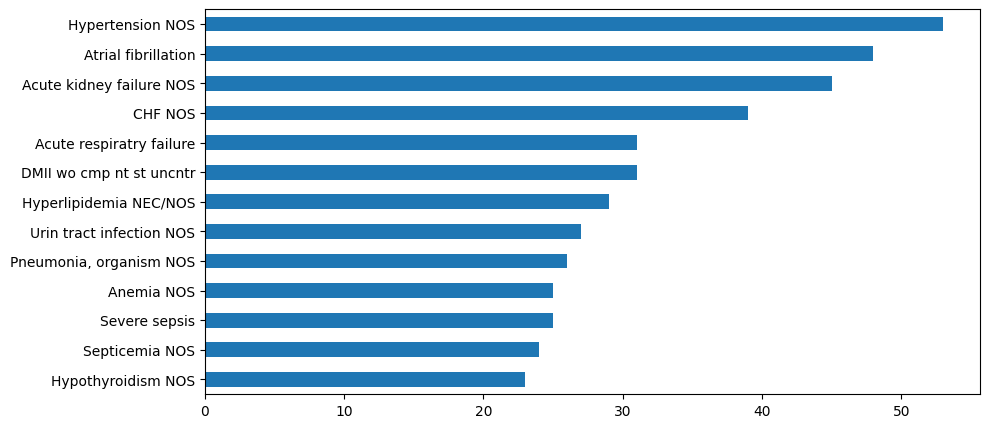

In [116]:
plt.figure(figsize=(10, 5))
p = d1.short_title.value_counts().sort_values()
p[ p >= 20 ].plot(kind="barh")
plt.show()

In [117]:
len(d1)

1716

In [118]:
d1.columns

Index(['subject_id', 'hadm_id', 'seq_num', 'icd9_code', 'short_title'], dtype='object')

In [119]:
g = d1.groupby([ 'subject_id' ])
g

In [120]:
list(g)[0]

<ipython-input-120-9c863bac1798>:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  list(g)[0]


(10006,
      subject_id  hadm_id  seq_num icd9_code               short_title
 0         10006   142345        1     99591                    Sepsis
 10        10006   142345        2     99662  React-oth vasc dev/graft
 13        10006   142345        4     40391    Hyp kid NOS w cr kid V
 20        10006   142345        5     42731       Atrial fibrillation
 68        10006   142345        6      4280                   CHF NOS
 107       10006   142345        7      4241     Aortic valve disorder
 113       10006   142345        8      4240     Mitral valve disorder
 123       10006   142345       10     03819  Staphylcocc septicem NEC
 124       10006   142345       11      7850           Tachycardia NOS
 127       10006   142345       12     E8791  Abn react-renal dialysis
 128       10006   142345       13      V090    Inf mcrg rstn pncllins
 131       10006   142345       14     56211   Dvrtcli colon w/o hmrhg
 133       10006   142345       15     28529  Anemia-other chronic di

In [121]:
g.count()

,hadm_id,seq_num,icd9_code,short_title
subject_id,,,,
10006,19,19,19,19
10011,6,6,6,6
10013,8,8,8,8
10017,14,14,14,14
10019,12,12,12,12
...,...,...,...,...
44083,14,14,14,14
44154,8,8,8,8
44212,23,23,23,23


In [122]:
for p_id, df in g:
  print("Patient ID: ", p_id)
  print(f'\t{ df.short_title.values }')
  print('-'*100)


<ipython-input-122-5030ac146c2d>:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for p_id, df in g:


Patient ID:  10006
	['Sepsis' 'React-oth vasc dev/graft' 'Hyp kid NOS w cr kid V'
 'Atrial fibrillation' 'CHF NOS' 'Aortic valve disorder'
 'Mitral valve disorder' 'Staphylcocc septicem NEC' 'Tachycardia NOS'
 'Abn react-renal dialysis' 'Inf mcrg rstn pncllins'
 'Dvrtcli colon w/o hmrhg' 'Anemia-other chronic dis'
 'DMII wo cmp nt st uncntr' 'Long-term use of insulin'
 'Adv eff anticoagulants' 'Crnry athrscl natve vssl' 'Gout NOS'
 'Tobacco use disorder']
----------------------------------------------------------------------------------------------------
Patient ID:  10011
	['Acute necrosis of liver' 'Hpt B acte wo cm wo dlta'
 'Chrnc hpt C wo hpat coma' 'Opioid dependence-contin'
 'Thrombocytopenia NOS' 'Hyperosmolality']
----------------------------------------------------------------------------------------------------
Patient ID:  10013
	['Atrial fibrillation' 'Mitral valve disorder' 'Septicemia NOS'
 'Subendo infarct, initial' 'Cardiogenic shock' 'Pneumonia, organism NOS'
 'Oth ly

In [123]:
d2 = pd.merge( patients, admissions, on="subject_id" )

In [124]:
patients.columns

Index(['subject_id', 'gender', 'dob', 'dod', 'dod_hosp', 'dod_ssn',
       'expire_flag'],
      dtype='object')

In [125]:
admissions.columns

Index(['subject_id', 'hadm_id', 'admittime', 'dischtime', 'deathtime',
       'admission_type', 'admission_location', 'discharge_location',
       'insurance', 'language', 'religion', 'marital_status', 'ethnicity',
       'edregtime', 'edouttime', 'diagnosis', 'hospital_expire_flag',
       'has_chartevents_data'],
      dtype='object')

In [126]:
d2.columns

Index(['subject_id', 'gender', 'dob', 'dod', 'dod_hosp', 'dod_ssn',
       'expire_flag', 'hadm_id', 'admittime', 'dischtime', 'deathtime',
       'admission_type', 'admission_location', 'discharge_location',
       'insurance', 'language', 'religion', 'marital_status', 'ethnicity',
       'edregtime', 'edouttime', 'diagnosis', 'hospital_expire_flag',
       'has_chartevents_data'],
      dtype='object')

In [127]:
d2

,subject_id,gender,dob,dod,dod_hosp,dod_ssn,expire_flag,hadm_id,admittime,dischtime,...,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data
0,10006,F,2094-03-05 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,1,142345,2164-10-23 21:09:00,2164-11-01 17:15:00,...,Medicare,NaN,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,2164-10-23 16:43:00,2164-10-23 23:00:00,SEPSIS,0,1
1,10011,F,2090-06-05 00:00:00,2126-08-28 00:00:00,2126-08-28 00:00:00,NaN,1,105331,2126-08-14 22:32:00,2126-08-28 18:59:00,...,Private,NaN,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,NaN,NaN,HEPATITIS B,1,1
2,10013,F,2038-09-03 00:00:00,2125-10-07 00:00:00,2125-10-07 00:00:00,2125-10-07 00:00:00,1,165520,2125-10-04 23:36:00,2125-10-07 15:13:00,...,Medicare,NaN,CATHOLIC,NaN,UNKNOWN/NOT SPECIFIED,NaN,NaN,SEPSIS,1,1
3,10017,F,2075-09-21 00:00:00,2152-09-12 00:00:00,NaN,2152-09-12 00:00:00,1,199207,2149-05-26 17:19:00,2149-06-03 18:42:00,...,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,2149-05-26 12:08:00,2149-05-26 19:45:00,HUMERAL FRACTURE,0,1
4,10019,M,2114-06-20 00:00:00,2163-05-15 00:00:00,2163-05-15 00:00:00,2163-05-15 00:00:00,1,177759,2163-05-14 20:43:00,2163-05-15 12:00:00,...,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,NaN,NaN,ALCOHOLIC HEPATITIS,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,44083,M,2057-11-15 00:00:00,2114-02-20 00:00:00,2114-02-20 00:00:00,2114-02-20 00:00:00,1,198330,2112-05-28 15:45:00,2112-06-07 16:50:00,...,Private,ENGL,CATHOLIC,SINGLE,WHITE,2112-05-28 13:16:00,2112-05-28 17:30:00,PERICARDIAL EFFUSION,0,1
125,44154,M,1878-05-14 00:00:00,2178-05-15 00:00:00,2178-05-15 00:00:00,2178-05-15 00:00:00,1,174245,2178-05-14 20:29:00,2178-05-15 09:45:00,...,Medicare,ENGL,PROTESTANT QUAKER,MARRIED,WHITE,2178-05-14 17:37:00,2178-05-14 22:08:00,ALTERED MENTAL STATUS,1,1
126,44212,F,2078-06-16 00:00:00,2124-01-29 00:00:00,NaN,2124-01-29 00:00:00,1,163189,2123-11-24 14:14:00,2123-12-30 14:31:00,...,Medicare,ENGL,UNOBTAINABLE,SINGLE,BLACK/AFRICAN AMERICAN,NaN,NaN,ACUTE RESPIRATORY DISTRESS SYNDROME;ACUTE RENA...,0,1
127,44222,M,2107-06-27 00:00:00,2182-08-03 00:00:00,2182-08-03 00:00:00,NaN,1,192189,2180-07-19 06:55:00,2180-07-20 13:00:00,...,Medicare,ENGL,CATHOLIC,SINGLE,WHITE,2180-07-19 04:50:00,2180-07-19 08:23:00,BRADYCARDIA,0,1


In [128]:
d2.groupby([ 'insurance', 'diagnosis' ]).subject_id.count()

insurance   diagnosis                                       
Government  TACHYPNEA;TELEMETRY                                 1
Medicaid    AROMEGLEY;BURKITTS LYMPHOMA                         1
            BRAIN METASTASES                                    1
            FAILURE TO THRIVE                                   1
            HEPATIC ENCEP                                       1
                                                               ..
Private     SHORTNESS OF BREATH                                 1
            STATUS POST MOTOR VEHICLE ACCIDENT WITH INJURIES    1
            TRACHEAL STENOSIS                                   1
            UPPER GI BLEED                                      1
            UROSEPSIS                                           1
Name: subject_id, Length: 101, dtype: int64

In [129]:
d2.groupby([ 'insurance', 'diagnosis' ]).subject_id.count().max()

9

In [130]:
d2.groupby([ 'insurance', 'diagnosis' ]).subject_id.count().argmax()

61

In [96]:
d2.groupby([ 'insurance', 'diagnosis' ]).subject_id.count().index[61]

('Medicare', 'SEPSIS')